In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "C:\\Users\\hyukk\\Desktop\\Pretest\\"
fileNames = sorted(glob.glob(path + "*"))
print(fileNames)

['C:\\Users\\hyukk\\Desktop\\Pretest\\Base', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s1_10', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s1_20', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s1_30', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s1_40', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s1_50', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s1_60', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s2_10', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s2_20', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s2_30', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s2_40', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s2_50', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s2_60', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s3_10', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s3_20', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s3_30', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s3_40', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s3_50', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s3_60']


In [3]:
for file in fileNames:
    
    df = pd.read_table(file, names= ["col"])
    df = df.iloc[:, 0].str[-39:]
    df = pd.DataFrame(df, columns= ['col'])
    
    s1 = df["col"].str[4:9]
    s2 = df["col"].str[9:14]
    s3 = df["col"].str[14:19]
    s4 = df["col"].str[20:25]
    s5 = df["col"].str[25:30]
    s6 = df["col"].str[30:35]
    
    res = pd.concat((s1, s2), axis=1)
    res = pd.concat((res, s3), axis=1)
    res = pd.concat((res, s4), axis=1)
    res = pd.concat((res, s5), axis=1)
    res = pd.concat((res, s6), axis=1)

    res.columns = ["s1", "s2", "s3", "s4", "s5", "s6"]
    
    saveFileName = str(file.split(f"{path}")[1])
    res.to_csv(path + saveFileName + ".csv", sep = ",")

In [4]:
convertedFileList = sorted(glob.glob(path + "*.csv"))
print(convertedFileList)

['C:\\Users\\hyukk\\Desktop\\Pretest\\Base.csv', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s1_10.csv', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s1_20.csv', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s1_30.csv', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s1_40.csv', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s1_50.csv', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s1_60.csv', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s2_10.csv', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s2_20.csv', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s2_30.csv', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s2_40.csv', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s2_50.csv', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s2_60.csv', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s3_10.csv', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s3_20.csv', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s3_30.csv', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s3_40.csv', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s3_50.csv', 'C:\\Users\\hyukk\\Desktop\\Pretest\\s3_60.csv']


In [5]:
sensor1Data = pd.DataFrame()
sensor2Data = pd.DataFrame()
sensor3Data = pd.DataFrame()

dfBaseMean = pd.DataFrame()

In [6]:
for file in convertedFileList:
    
    name = file.split(f"{path}")[1]
    
    if name.startswith("s"):
        distance = name.split('_')[1]
        distance = distance.split(".")[0]

        if name.split("_")[0] == "s1":
            sensorData = pd.read_csv(file, sep= ",", usecols= [1], names = [f"d{distance}"], skiprows= [0])
            sensor1Data = pd.concat((sensor1Data, sensorData), axis = 1)
            
        elif name.split("_")[0] == "s2":
            sensorData = pd.read_csv(file, sep= ",", usecols= [2], names = [f"d{distance}"], skiprows= [0])
            sensor2Data = pd.concat((sensor2Data, sensorData), axis = 1)

        elif name.split("_")[0] == "s3":
            sensorData = pd.read_csv(file, sep= ",", usecols= [3], names = [f"d{distance}"], skiprows= [0])
            sensor3Data = pd.concat((sensor3Data, sensorData), axis = 1)
            
    elif name.startswith("Base"):
        base = pd.read_csv(file, sep= ",", usecols= [1, 2, 3, 4, 5, 6])
        baseMean = base.mean(axis = 0)
        dfBaseMean = pd.concat((dfBaseMean, baseMean), axis= 1).T.to_numpy().reshape(6,)

In [7]:
print(dfBaseMean)

[ 170.41685343   87.24518153  134.37740923   27.91618108 -232.2765576
 -473.62483191]


In [8]:
scaledSensor1 = sensor1Data - dfBaseMean[0]

In [9]:
def plotResult(minRow, maxRow, data, imgTitle):
    rowList = np.arange(minRow, maxRow, 1)
    plotData = data.loc[rowList, :]
    plotData.plot(kind= "line", title= imgTitle)

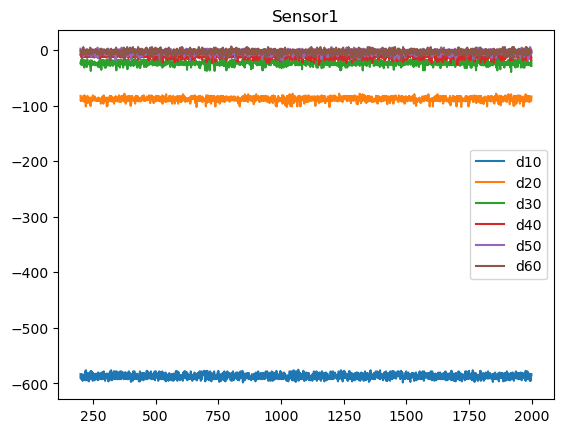

In [12]:
plotResult(200, 2000, scaledSensor1, "Sensor1")

plt.show()